# Relax Inc. - Take-Home Challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

In [2]:
users = pd.read_csv('takehome_users.csv', encoding='ISO-8859-1', parse_dates=['creation_time', 'last_session_creation_time'])

In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0


In [4]:
user_engage = pd.read_csv('takehome_user_engagement.csv', parse_dates=['time_stamp'])

In [5]:
user_engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
users.shape

(12000, 10)

In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   object        
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 937.6+ KB


In [8]:
user_engage.shape

(207917, 3)

In [9]:
user_engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [10]:
user_engage = user_engage.set_index('time_stamp')
user_engage.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [11]:
# Group by user_id and resample over 1 week period, sum count by user_id
adopted_users = user_engage.groupby([pd.Grouper(freq='W'), 'user_id']).sum()
adopted_users.head()

visited
time_stamp user_id         
2012-06-03 563            1
           1693           1
           1995           1
           2120           1
           2136           1

In [12]:
adopted_users.reset_index()
adopted_users.head()

visited
time_stamp user_id         
2012-06-03 563            1
           1693           1
           1995           1
           2120           1
           2136           1

In [13]:
# Adopted users would be users who visited at least 3 times in a week
adopted = adopted_users[adopted_users['visited'] >= 3].unstack(level=1).melt()
adopted.head()

,None,user_id,value
0,visited,1693,3.0
1,visited,1693,NaN
2,visited,1693,3.0
3,visited,1693,NaN
4,visited,1693,3.0


In [14]:
adopted.duplicated()

0         False
1         False
2          True
3          True
4          True
          ...  
151720     True
151721     True
151722     True
151723     True
151724    False
Length: 151725, dtype: bool

In [15]:
# Add adopted users to users df
users['adopted'] = [user in np.unique(adopted['user_id']) for user in users.index]

In [16]:
# Check proportion of users adopted
users['adopted'].value_counts()

False    10555
True      1445
Name: adopted, dtype: int64

Text(0.5, 1.0, 'Unadopted vs. Adopted Users')

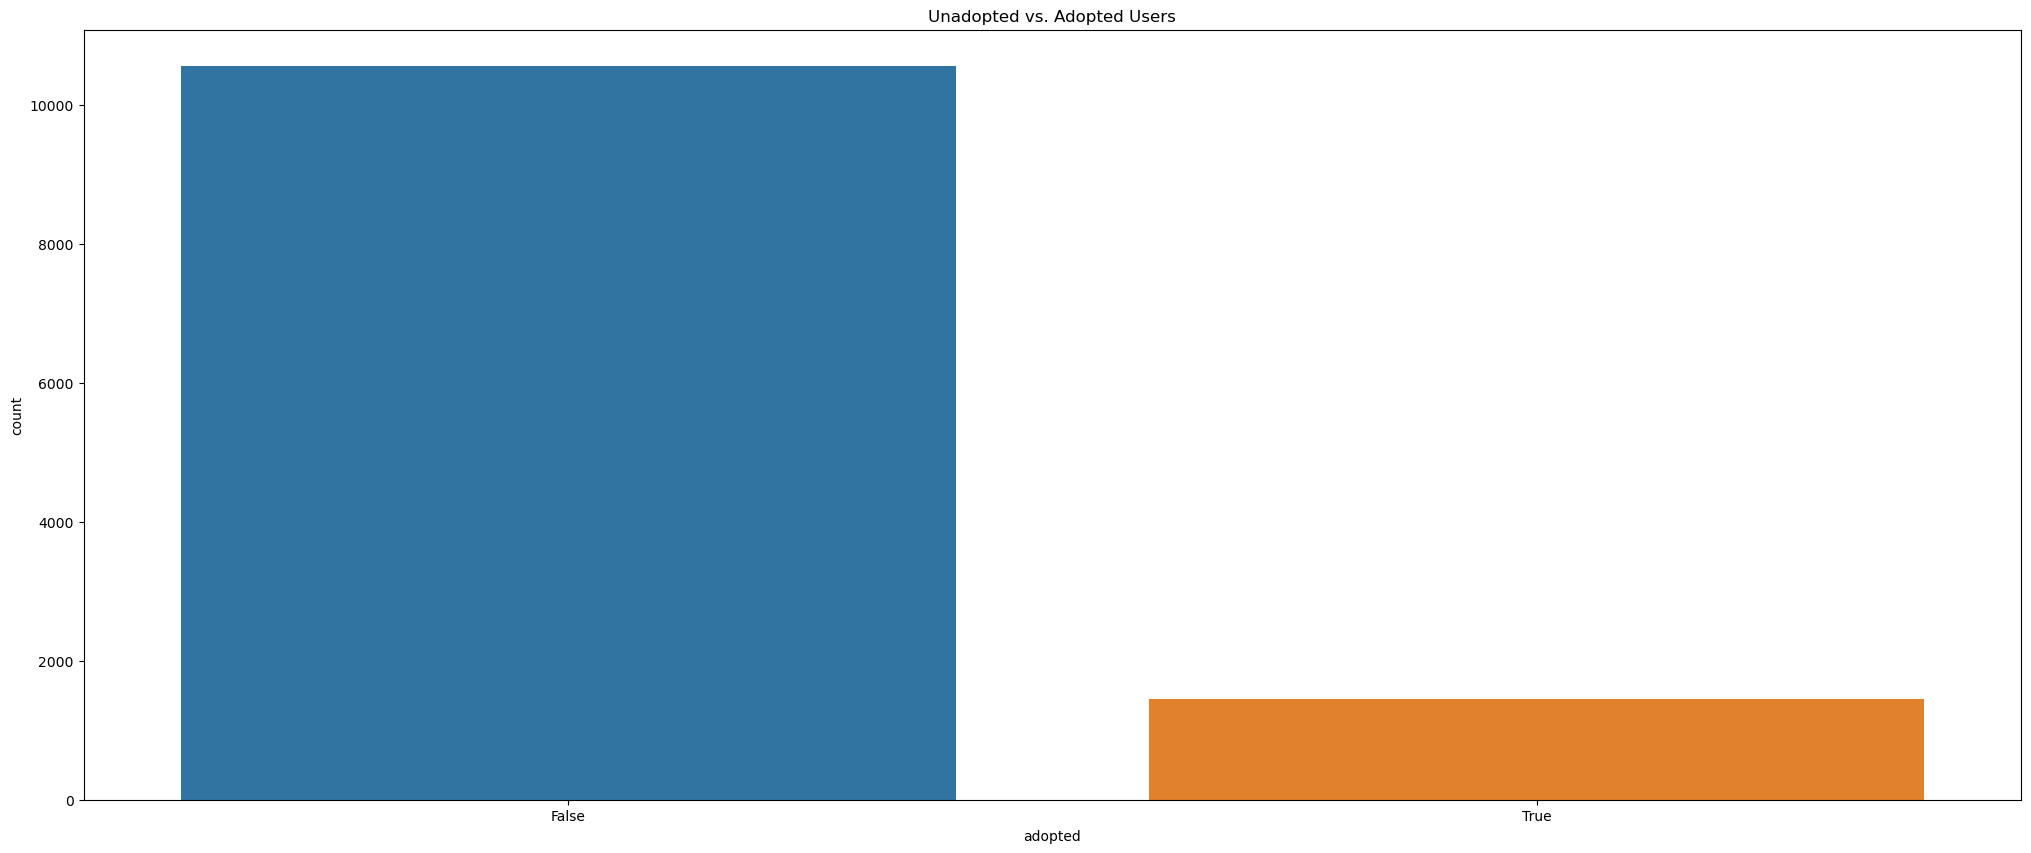

In [17]:
# Visualize distrubtion of adopted vs unadopted users
fig = plt.figure(figsize=(25,10)) 
sns.countplot(x='adopted', data=users)
plt.title("Unadopted vs. Adopted Users")

In [18]:
# adoption Rate
adoption_rate = (1445 / 12000) * 100
print(f"Adoption Rate: {adoption_rate: .2f}%")

Adoption Rate:  12.04%


In [19]:
# Add column for users who were invited by another user
users['invited'] = users['invited_by_user_id'].notnull()

In [20]:
# Deal with nulls in last session creation time
users.loc[users.last_session_creation_time.isnull(), 'last_session_creation_time'] = 0

In [21]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0,False,True
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0,False,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0,True,True
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0,False,True
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0,False,True


In [22]:
users.shape

(12000, 12)

In [23]:
# Drop irrelevant columns
df = users.drop(columns=['creation_time', 'name', 'email', 'invited_by_user_id'])

In [24]:
df.shape

(12000, 8)

In [25]:
df.dtypes

object_id                      int64
creation_source               object
last_session_creation_time    object
opted_in_to_mailing_list       int64
enabled_for_marketing_drip     int64
org_id                         int64
adopted                         bool
invited                         bool
dtype: object

In [26]:
df.set_index('object_id', inplace=True)
df.head()

,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted,invited
object_id,,,,,,,
1,GUEST_INVITE,1398138810,1,0,11,False,True
2,ORG_INVITE,1396237504,0,0,1,False,True
3,ORG_INVITE,1363734892,0,0,94,True,True
4,GUEST_INVITE,1369210168,0,0,1,False,True
5,GUEST_INVITE,1358849660,0,0,193,False,True


In [27]:
# Convert categorical columns to dummies
df = pd.get_dummies(df, columns=['creation_source', 'invited'], drop_first=True)

In [28]:
df.shape

(12000, 10)

In [29]:
df.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,invited_True
object_id,,,,,,,,,,
1,1398138810,1,0,11,False,0,0,0,0,1
2,1396237504,0,0,1,False,1,0,0,0,1
3,1363734892,0,0,94,True,1,0,0,0,1
4,1369210168,0,0,1,False,0,0,0,0,1
5,1358849660,0,0,193,False,0,0,0,0,1


# Feature Selection

In [30]:
# Feature Selection
y = df['adopted']
X = df.drop(['adopted','org_id'], axis=1)

In [31]:
y.shape

(12000,)

In [32]:
X.shape

(12000, 8)

# Pre-Processing and Training

In [33]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.preprocessing import scale, StandardScaler

# Split into train/test data sets with stratification of target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=24,
                                                    stratify = y)

In [34]:
# Confirm training data shape
print("Training set Shape:", X_train.shape, y_train.shape)

Training set Shape: (8400, 8) (8400,)


In [35]:
# Confirm testing data shape
print("Testing set Shape:", X_test.shape, y_test.shape)

Testing set Shape: (3600, 8) (3600,)


In [47]:
# Make Scaler object
scaler = StandardScaler()

# Fit scaler based on training data
scaler.fit(X_train)

StandardScaler()

In [48]:
# Transform training data using fitted scaler
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# Re-introduce column names back into new scaled df
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# View new scaled df appearance
X_train.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,invited_True
0,0.641282,-0.575151,-0.422043,-0.743811,-0.466442,-0.456383,2.790450,-1.072888
1,-1.652664,-0.575151,-0.422043,-0.743811,2.143891,-0.456383,-0.358365,-1.072888
2,0.630217,-0.575151,-0.422043,1.344428,-0.466442,-0.456383,-0.358365,0.932064
3,-1.652664,1.738674,2.369425,-0.743811,2.143891,-0.456383,-0.358365,-1.072888
4,-1.652664,-0.575151,2.369425,1.344428,-0.466442,-0.456383,-0.358365,0.932064


# Predictive Modeling

In [36]:
# Libraries for modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn import feature_selection

# Libraries for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer

# Suppress future warning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [37]:
# Define function for evaluation reports
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = classification_report(y_train, pred)
        print("Training Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = classification_report(y_test, pred)
        print("Testing Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## Random Forest Classifier

In [50]:
# Create a Random Forest Classifier Object
rf_clf1 = RandomForestClassifier(n_estimators=100, random_state=30)

# Fit Random Forest Classifier to training data
rf_clf1.fit(X_train, y_train)

# Make preditions on the test set
y_pred = rf_clf1.predict(X_test)

In [51]:
# Review performance metrics
print_score(rf_clf1, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf1, X_train, y_train, X_test, y_test, train=False)

Training Result:
Accuracy Score: 96.56%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98      7388
        True       1.00      0.72      0.83      1012

    accuracy                           0.97      8400
   macro avg       0.98      0.86      0.91      8400
weighted avg       0.97      0.97      0.96      8400

_______________________________________________
Confusion Matrix: 
 [[7387    1]
 [ 288  724]]

Testing Result:
Accuracy Score: 81.11%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       False       0.88      0.91      0.89      3167
        True       0.10      0.07      0.09       433

    accuracy                           0.81      3600
   macro avg       0.49      0.49      0.49      3600
weighted avg       0.78      0.81      0.80      3600

_____________________________

In [52]:
# Review ROC AUC score
rf_roc = roc_auc_score(y_test, rf_clf1.predict_proba(X_test)[:,1])
print("ROC AUC Score:", rf_roc)

ROC AUC Score: 0.5041814001346157


In [41]:
# Define the random forest hyperparameter grid
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [1, 2, 3, 4]
bootstrap = [True, False]

params_grid = {
    'n_estimators': n_estimators, 
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf, 
    'bootstrap': bootstrap
}

In [53]:
# Create a Random Forest Classifier Object
rf_clf2 = RandomForestClassifier(random_state=30)

# Use RandomizedSearchCV to perform a hyperparameter search
rf_cv = RandomizedSearchCV(
    estimator=rf_clf2, 
    scoring='roc_auc',
    param_distributions=params_grid,
    n_iter=100,
    cv=5, 
    verbose=1, 
    random_state=30,
    n_jobs=-1
)

rf_cv.fit(X_train, y_train)

# Get best parameters
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params}")

# Train Random Forest Classifier using best parameters and fit to model
rf_clf3 = RandomForestClassifier(**rf_best_params)
rf_clf3.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best paramters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40, 'bootstrap': False}


RandomForestClassifier(bootstrap=False, max_depth=40, n_estimators=1000)

In [54]:
# Review performance metrics
print_score(rf_clf3, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf3, X_train, y_train, X_test, y_test, train=False)

Training Result:
Accuracy Score: 96.61%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98      7388
        True       1.00      0.72      0.84      1012

    accuracy                           0.97      8400
   macro avg       0.98      0.86      0.91      8400
weighted avg       0.97      0.97      0.96      8400

_______________________________________________
Confusion Matrix: 
 [[7388    0]
 [ 285  727]]

Testing Result:
Accuracy Score: 81.06%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       False       0.88      0.91      0.89      3167
        True       0.10      0.08      0.09       433

    accuracy                           0.81      3600
   macro avg       0.49      0.49      0.49      3600
weighted avg       0.79      0.81      0.80      3600

_____________________________

In [55]:
# Review ROC AUC score
rf_roc_final = roc_auc_score(y_test, rf_clf3.predict_proba(X_test)[:,1])
print("ROC AUC Score:", rf_roc_final)

ROC AUC Score: 0.5138837944127919


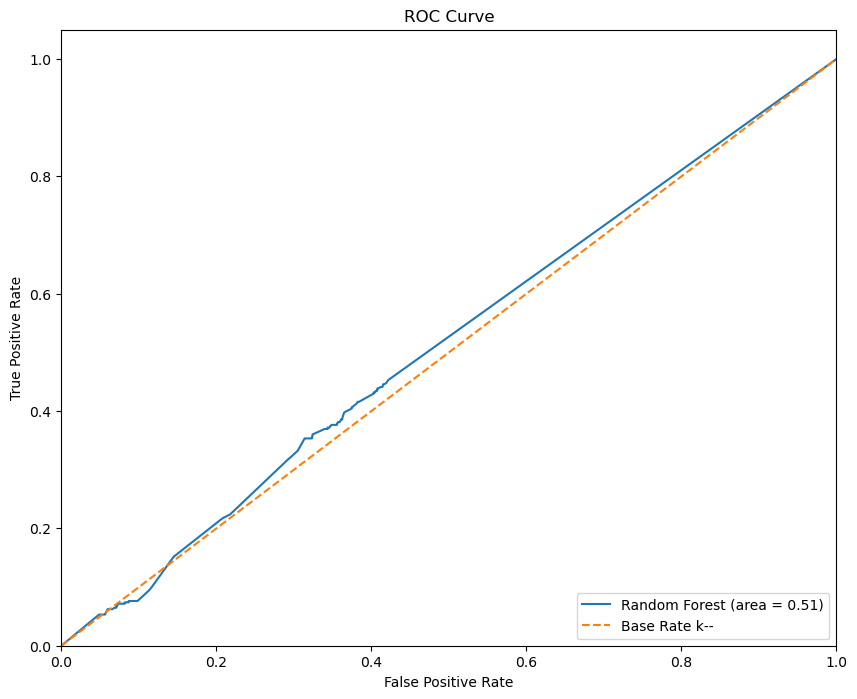

In [56]:
# Create ROC Graph
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_clf3.predict_proba(X_test)[:,1])
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_final)
plt.plot([0,1], [0,1],label='Base Rate k--', linestyle='--')

plt.gcf().set_size_inches(10, 8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'Most Important Predictors of Future User Adoption Based on Random Forest Model')

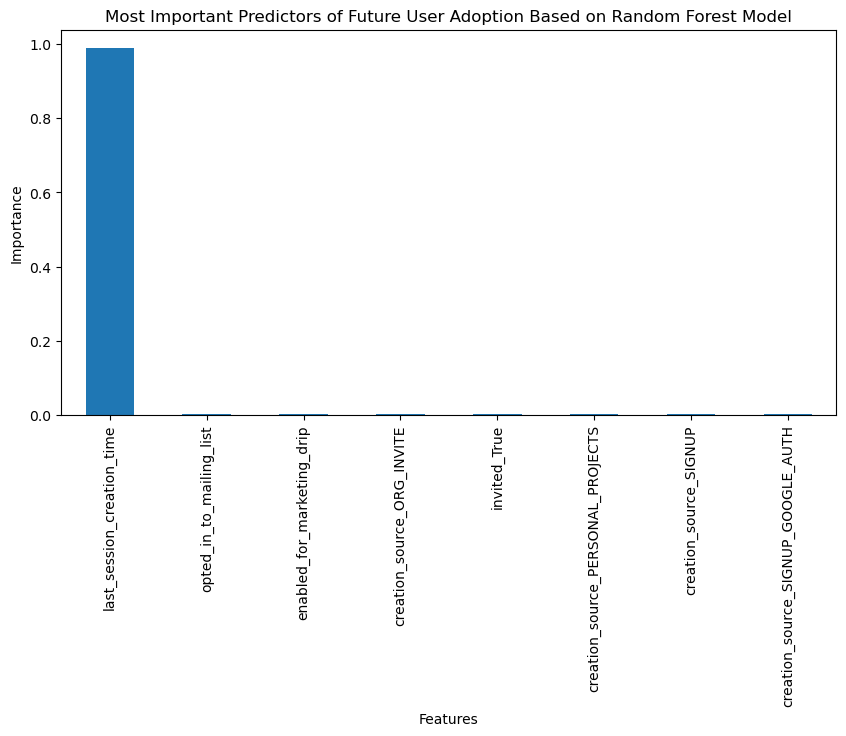

In [57]:
# Random Forest Feature Importance
plt.subplots(figsize=(10, 5))
imps = rf_cv.best_estimator_.feature_importances_
rf_feat_imps = pd.Series(imps, index=X.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Most Important Predictors of Future User Adoption Based on Random Forest Model')

Top 3 Most Important Predictors of Future User Adoption:

1. `last_session_creation_time`
2. `opted_in_to_mailing_list`
3. `enabled_for_marketing_drip`
4. `creation_source_org_INVITE`

# Conclusion

A brief investigation of the user engagement data revealed that 12.04% of Relax Inc.'s users were adopted users. In order to identify which factors predict future user adoption, we built a random forest classifier model. The final model was had a 96.61% training accuracy, but only a 81.06% testing accuracy. The large gap between training and testing accuracy as well as the AUC score of 51.38% suggests that the model was overfitting and was not able to generalize well to the testing data. It should also be noted that there was a moderate class imbalance in the target variable. 

With that said, the best predictors of future user adoption are: 
- `last_session_creation_time`: the most important predictor of future user adoption was when the user last logged in. This make sense since users who did not log in recently would probably not be adopted users. It also be noted that there was some missing data that we filled in with 0 for this variable. 
- `opted_in_to_mailing_list`: the next best indicator were for users who opted into receiving the mailing emails. 
- `enabled_for_marketing_drip`: users who enabled for the regular marketing drip were also more likely to be adopted. 
- `creation_source_org_INVITE`: another important indicator were users who created their account because they were invited by an organization.

Some potential future reearch would be to try to build a predictive model that would better handle the class imbalance or possibly using measures to handle the class imbalance such as SMOTE in order to build a model that could more effective generalize to the testing data. 